## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): Целищев Иван

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights, marks):
    return round((weights * marks).sum())

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8.0

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [4]:
def change_array(array, number):
    array[::3] = number
    return array

In [5]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [6]:
def find_close(array1, array2, precision):
    return (np.nonzero((abs(array1 - array2) < precision))[0])

In [7]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6], dtype=int64)

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [8]:
def block_matrix(block):
    a = np.hstack((block,block))
    return (np.vstack((a,a)))

In [9]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [10]:
def diag_prod(matrix):
    return (matrix.diagonal()[matrix.diagonal() != 0]).prod()

In [11]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [12]:
def normalize(matrix):
    vsr = matrix - matrix.sum(axis = 0)/(matrix.shape[1])
    stot = matrix.std(axis = 0)
    vsr[:, stot != 0] = vsr[:, stot != 0]/stot[stot != 0]
    return (vsr.round(2))

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.71, -0.39,  0.46],
       [-1.41,  1.37,  0.93],
       [ 0.71, -0.98, -1.39]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [14]:
def antiderivative(coefs):
    return np.polyint(coefs)

In [15]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([ 1.,  2.,  0.,  1.,  0.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [16]:
def make_symmetric(matrix):
    m = matrix + matrix.transpose()
    n = m.shape[0]
    m[range(n),range(n)] = m[range(n),range(n)]/2
    return (m)

In [17]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [18]:
def construct_matrix(m, a, b):
    z = np.zeros((m,b - a + 1))
    z += np.arange(a, b+1)
    return z

In [19]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [20]:
def cosine_similarity(vec1, vec2):
    s = (vec1 * vec2).sum()
    pr = ((vec1**2).sum())**(0.5)*((vec2**2).sum())**(0.5)
    return s/pr

In [21]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [23]:
data = pd.read_csv('train.csv', delimiter = ',')
display(data.shape, data.head(), data.tail())

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId - порядковый, Survived - бинарный, Pclass - категориальный, Name - категориальный, Sex - бинарный, Age - вещественный, SibSp - вещественный, Parch - вещественный, Ticket - категориальный, Fare - вещественный, Cabin - категориальный, Embarked - категориальный.

Регрессия : предсказывание выживаемости по возрасту, полу.
Классификация : по наличию семьи на корабле(с родственниками, без родственников).
Кластеризация : разделение на кластеры по размеру семьи на борту.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [24]:
print('Доля выживших:', dict(data['Survived'].value_counts(normalize = True))[1])
print(data[(data['Survived'] == 1)]['Sex'].value_counts(normalize = True))

Доля выживших: 0.383838383838
female    0.681287
male      0.318713
Name: Sex, dtype: float64


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [25]:
print(data['Pclass'].value_counts())
d = dict(data['Pclass'].value_counts())
m = max(d, key = d.get)
d = dict(data[data['Pclass'] == m]['Sex'].value_counts())
print('Больше :', max(d, key = d.get))

3    491
1    216
2    184
Name: Pclass, dtype: int64
Больше : male


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Минимальная сумма : 0.0 
 Средняя сумма : 32.2042079685746 
 Максимальная сумма : 512.3292 

Севшие в Саутгемптоне : 

Минимальная сумма : 0.0 
 Средняя сумма : 27.07981180124218 
 Максимальная сумма : 263.0


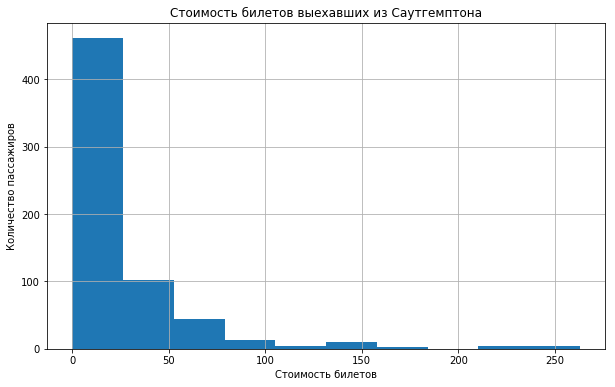

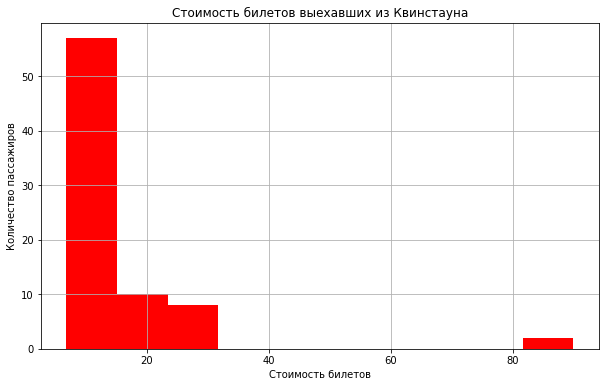

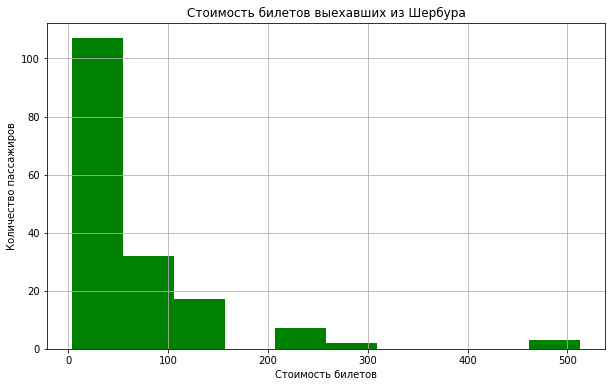

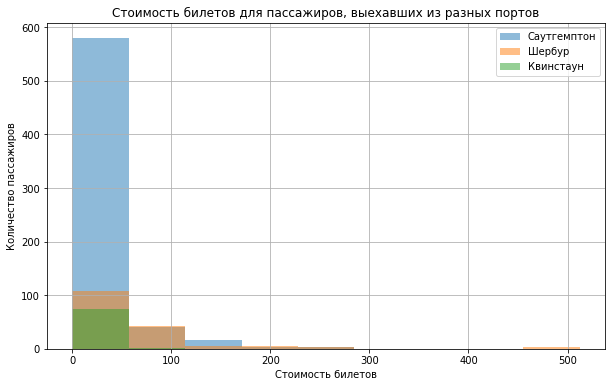

In [26]:
print('Минимальная сумма :', data['Fare'].min(), '\n',
      'Средняя сумма :', data['Fare'].mean(), '\n',
      'Максимальная сумма :', data['Fare'].max(),'\n')
print("Севшие в Саутгемптоне :", '\n',)
print('Минимальная сумма :', data[(data['Embarked'] == 'S')]['Fare'].min(), '\n',
        'Средняя сумма :', data[(data['Embarked'] == 'S')]['Fare'].mean(), '\n',
        'Максимальная сумма :', data[(data['Embarked'] == 'S')]['Fare'].max())
plt.figure(figsize=(10,6))
plt.title('Стоимость билетов выехавших из Саутгемптона')
data[(data['Embarked'] == 'S')]['Fare'].hist()
plt.xlabel('Стоимость билетов')
plt.ylabel('Количество пассажиров')
plt.figure(figsize=(10,6))
plt.title('Стоимость билетов выехавших из Квинстауна')
data[(data['Embarked'] == 'Q')]['Fare'].hist(color = 'red')
plt.xlabel('Стоимость билетов')
plt.ylabel('Количество пассажиров')
plt.figure(figsize=(10,6))
plt.title('Стоимость билетов выехавших из Шербура')
data[(data['Embarked'] == 'C')]['Fare'].hist(color = 'green')
plt.xlabel('Стоимость билетов')
plt.ylabel('Количество пассажиров')
#Вариант со всеми гистограммами в одном окне
plt.figure(figsize=(10,6))
cols = np.linspace(0, data['Fare'].max(), 10)
data[(data['Embarked'] == 'S')]['Fare'].hist(label = 'Саутгемптон', bins = cols, alpha = 0.5)
data[(data['Embarked'] == 'C')]['Fare'].hist(label = 'Шербур', bins = cols, alpha = 0.5)
data[(data['Embarked'] == 'Q')]['Fare'].hist(label = 'Квинстаун', bins = cols, alpha = 0.5)
plt.title('Стоимость билетов для пассажиров, выехавших из разных портов')
plt.legend(loc = 'upper right')
plt.xlabel('Стоимость билетов')
plt.ylabel('Количество пассажиров')

plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [27]:
'''Не все признаки несут полезную информацию. Можно убрать признаки 'Name', 'Ticket', 'Cabin'. Name - просто справочная информация, 
которая не несет в себе никаких данных о пассажире, 'Ticket' - признак, представленный в непонятном формате, 
'Cabin' - мало у каких обьектов заполнен признак (у 204, проверка ниже)''' 
print(pd.notnull(data['Cabin']).sum())
data.drop(['Name', 'Ticket', 'Cabin'], inplace = True, axis = 1)

204


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [29]:
#Признак 'Embarked' заполнен почти у всех обьектов, оставшиеся два заполним наиболее встречающимся элементом этого признака
#Признак 'Age' - вещественный, заменим пропущенные значением медианы для данного признака 
data['Embarked'].fillna(max(dict(data['Embarked'].value_counts()), key = (dict(data['Embarked'].value_counts())).get), inplace = True)
data['Age'].fillna(data['Age'].median(), inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

Коэффициент корреляции :  0.0966884221804


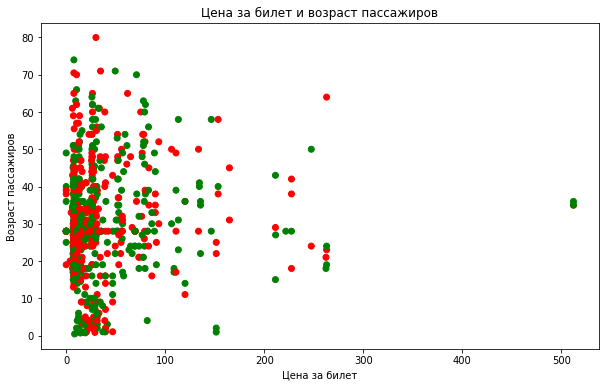

In [30]:
print('Коэффициент корреляции : ', data['Fare'].corr(data['Age'], method = 'pearson'))
colors = ['red', 'green']
plt.figure(figsize=(10,6))
plt.scatter(data['Fare'], data['Age'], c = colors)
plt.title('Цена за билет и возраст пассажиров')
plt.xlabel('Цена за билет')
plt.ylabel('Возраст пассажиров')
plt.show()
#Зависимость мала, связь величин слабая (коэффициент < 0.3)

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Процент выживших с билетами дороже :
 59.7156398104
Процент выживших с билетами подешевле :
 31.7647058824 

Коэффициент корреляции между классом и выживаемостью: -0.338481035961
Процент выживших в 1 классе :
 62.962962963
Процент выживших во 2 классе :
 47.2826086957
Процент выживших в 3 классе :
 24.2362525458 



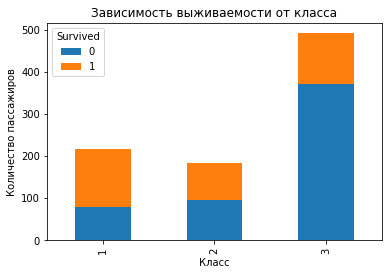

In [31]:
print('Процент выживших с билетами дороже :\n', dict(data[(data['Fare'] >= data['Fare'].mean())]['Survived'].value_counts(normalize = True)*100)[1])
print('Процент выживших с билетами подешевле :\n', dict(data[(data['Fare'] < data['Fare'].mean())]['Survived'].value_counts(normalize = True)*100)[1], '\n')
print('Коэффициент корреляции между классом и выживаемостью:', data['Pclass'].corr(data['Survived'], method = 'pearson'))
print('Процент выживших в 1 классе :\n', dict(data[(data['Pclass'] == 1)]['Survived'].value_counts(normalize = True)*100)[1])
print('Процент выживших во 2 классе :\n', dict(data[(data['Pclass'] == 2)]['Survived'].value_counts(normalize = True)*100)[1])
print('Процент выживших в 3 классе :\n', dict(data[(data['Pclass'] == 3)]['Survived'].value_counts(normalize = True)*100)[1], '\n')
#Абсолютное значение коэффициента корреляции в диапазоне 0.3 - 0.7. Между величинами свзяь средней тесноты.
plt.figure(figsize=(10,6))
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind = 'bar', stacked = True)
plt.title('Зависимость выживаемости от класса')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [32]:
data['FamMemb'] = data['SibSp'] + data['Parch'] + 1
# Новый признак : ChildSit - категориальный(0 - взрослый, 1 - ребенок без родителя, 2 - ребенок с родителем(-ями))
data['ChildSit'] = 0
data.loc[(data['Age'] < 18) & (data['Parch'] == 0), 'ChildSit'] = 1
data.loc[(data['Age'] < 18) & (data['Parch'] > 0), 'ChildSit'] = 2
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMemb,ChildSit
0,1,0,3,male,22.0,1,0,7.2500,S,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0
5,6,0,3,male,28.0,0,0,8.4583,Q,1,0
6,7,0,1,male,54.0,0,0,51.8625,S,1,0
7,8,0,3,male,2.0,3,1,21.0750,S,5,2
8,9,1,3,female,27.0,0,2,11.1333,S,3,0
9,10,1,2,female,14.0,1,0,30.0708,C,2,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Процент выживших, имеющих n родственников (считая самого пассажира) :
 1    47.660819
2    26.023392
3    17.251462
4     6.140351
7     1.169591
6     0.877193
5     0.877193
Name: FamMemb, dtype: float64


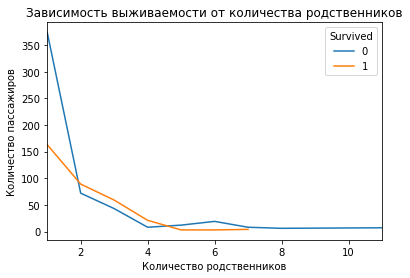

In [33]:
#Задание : как количество родственников влияет на выживаемость(используя созданный нами признак FamMemb)
print('Процент выживших, имеющих n родственников (считая самого пассажира) :\n', data[data['Survived'] == 1]['FamMemb'].value_counts(normalize = True)*100)
plt.figure(figsize=(10,6))
data.pivot_table('PassengerId', 'FamMemb', 'Survived', 'count').plot()
plt.title('Зависимость выживаемости от количества родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Количество пассажиров')
#Как мы видим, из людей, имеющих хотя бы одного родственника(и более), выжило немного

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

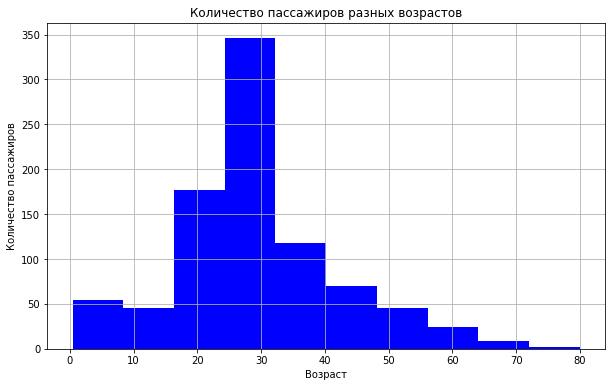

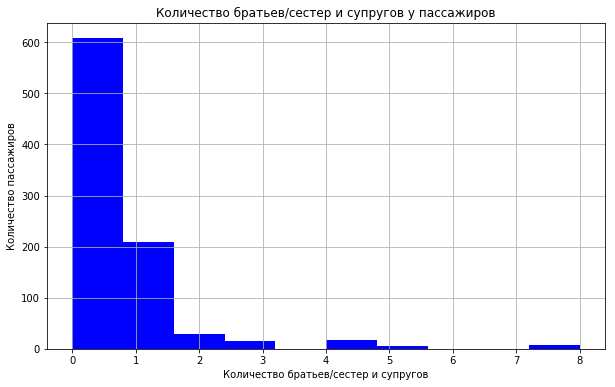

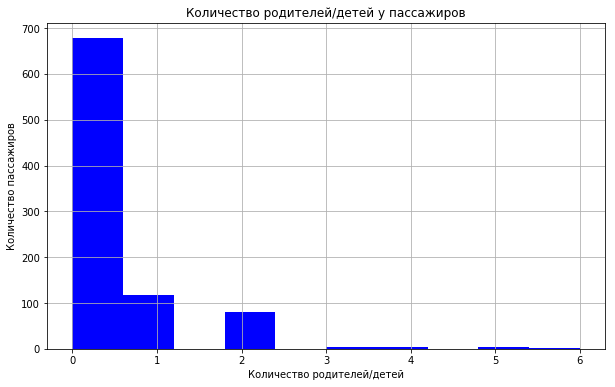

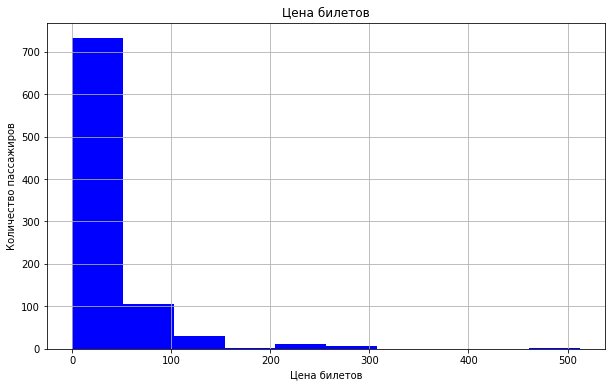

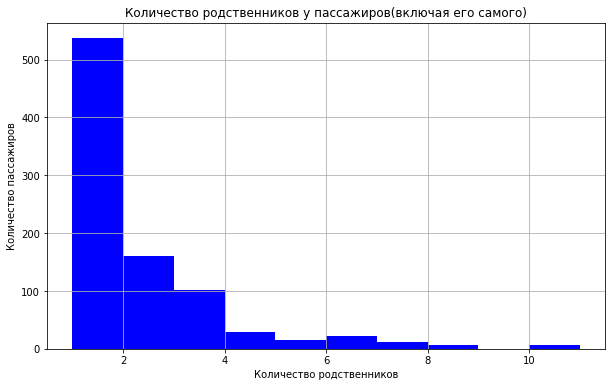

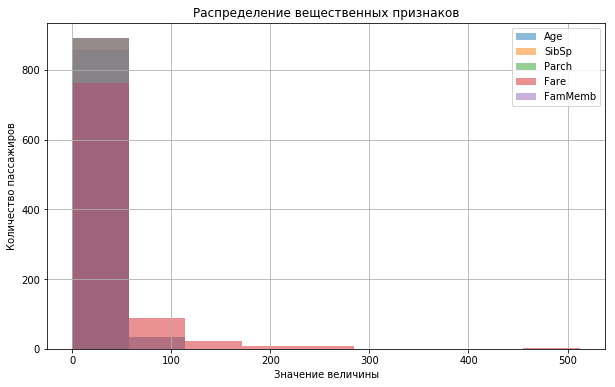

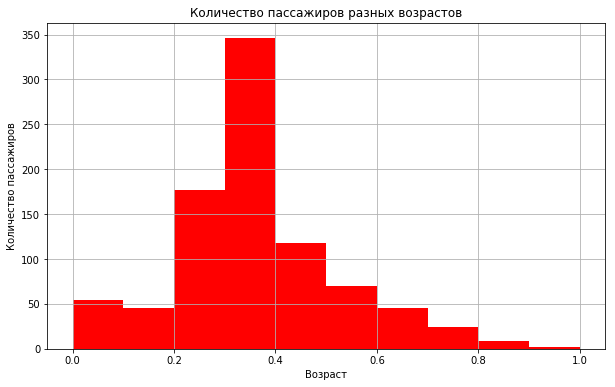

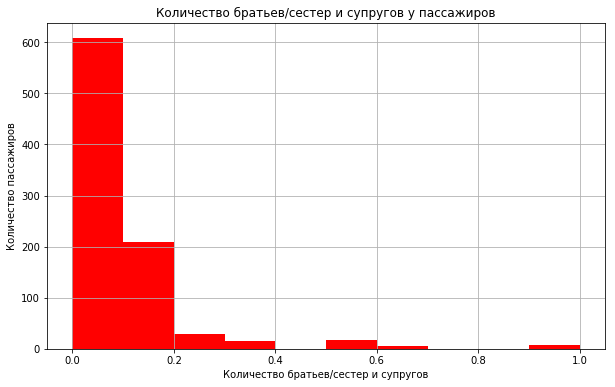

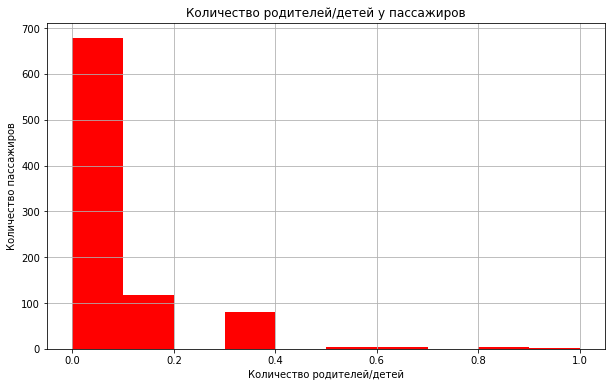

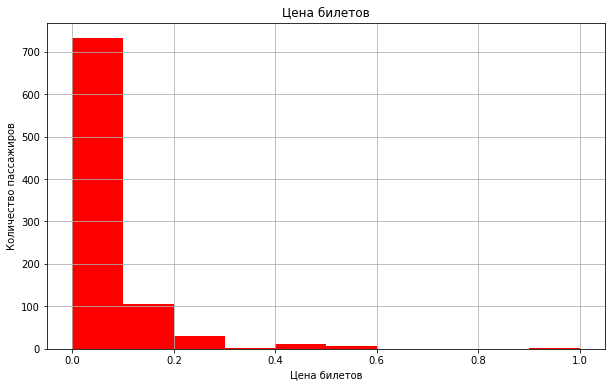

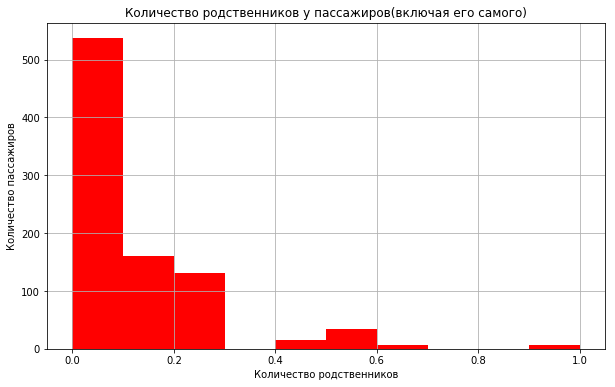

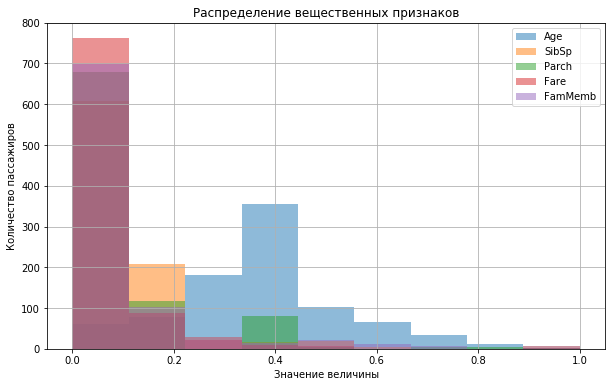

In [34]:
def histo(data , colors):
    plt.figure(figsize=(10,6))
    plt.title('Количество пассажиров разных возрастов')
    data['Age'].hist(color = colors)
    plt.xlabel('Возраст')
    plt.ylabel('Количество пассажиров')
    plt.figure(figsize=(10,6))
    plt.title('Количество братьев/сестер и супругов у пассажиров')
    data['SibSp'].hist(color = colors)
    plt.xlabel('Количество братьев/сестер и супругов')
    plt.ylabel('Количество пассажиров')
    plt.figure(figsize=(10,6))
    plt.title('Количество родителей/детей у пассажиров')
    data['Parch'].hist(color = colors)
    plt.xlabel('Количество родителей/детей')
    plt.ylabel('Количество пассажиров')
    plt.figure(figsize=(10,6))
    plt.title('Цена билетов')
    data['Fare'].hist(color = colors)
    plt.xlabel('Цена билетов')
    plt.ylabel('Количество пассажиров')
    plt.figure(figsize=(10,6))
    plt.title('Количество родственников у пассажиров(включая его самого)')
    data['FamMemb'].hist(color = colors)
    plt.xlabel('Количество родственников')
    plt.ylabel('Количество пассажиров')
    
    #Все в одном окне
    plt.figure(figsize=(10,6))
    cols = np.linspace(0, data['Fare'].max(), 10)
    data['Age'].hist(label = 'Age', bins = cols, alpha = 0.5)
    data['SibSp'].hist(label = 'SibSp', bins = cols, alpha = 0.5)
    data['Parch'].hist(label = 'Parch', bins = cols, alpha = 0.5)
    data['Fare'].hist(label = 'Fare', bins = cols, alpha = 0.5)
    data['FamMemb'].hist(label = 'FamMemb', bins = cols, alpha = 0.5)
    plt.xlabel('Значение величины')
    plt.ylabel('Количество пассажиров')
    plt.title('Распределение вещественных признаков')
    plt.legend(loc = 'upper right')

    plt.show()
    
histo(data, 'blue')
'''Они различаются масштабом(например возраст от 0 до 80, а цены от 0 до 500).
Если признаки имеют разные масштабы, то будут учитываться лишь самые крупные (в фунции расстояния).
Воспользуемся min-max нормализацией'''
s = data[['Age','SibSp','Parch','Fare','FamMemb']].copy()
s = (s - s.min())/(s.max() - s.min())#Значения всех величин лежат от 0 до 1
histo(s, 'red')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [35]:
data['Sex'].replace(['female', 'male'], [0,1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMemb,ChildSit
0,1,0,3,1,22.0,1,0,7.2500,0,2,0
1,2,1,1,0,38.0,1,0,71.2833,1,2,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,0
3,4,1,1,0,35.0,1,0,53.1000,0,2,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,0
5,6,0,3,1,28.0,0,0,8.4583,2,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,1,0
7,8,0,3,1,2.0,3,1,21.0750,0,5,2
8,9,1,3,0,27.0,0,2,11.1333,0,3,0
9,10,1,2,0,14.0,1,0,30.0708,1,2,1
